In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
tf.__version__

'2.3.0'

In [ ]:
!pip install tensorflow==2.3.0

     |████████████████████████████████| 320.4 MB 45 kB/s 
     |████████████████████████████████| 2.9 MB 43.5 MB/s 
     |████████████████████████████████| 459 kB 38.9 MB/s 
     |████████████████████████████████| 20.1 MB 1.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:


In [5]:
a = tf.constant(2.0)#상수
y = tf.constant(8.0)
x = tf.Variable(10.0)#변수

print(a)
print(x)

tf.Tensor(2.0, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=10.0>


In [6]:
loss = tf.math.abs(a*x-y)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

In [7]:
loss.numpy()

12.0

In [10]:

def train_func():
  #미분 사용하기
  with tf.GradientTape() as tape:
    #loss함수에서 loss 구하기
    loss = tf.math.abs(a*x - y)
    print("loss = {}, type = {}".format(loss, type(loss)))
 
  #x와 기울기출력
  dx = tape.gradient(loss, x)
  print("x = {}, dx = {}".format(x.numpy(), dx))

  #가중치 업데이트
  x.assign(x - dx)

for i in range(4):
  train_func()

loss = 0.0, type = <class 'tensorflow.python.framework.ops.EagerTensor'>
x = 4.0, dx = 0.0
loss = 0.0, type = <class 'tensorflow.python.framework.ops.EagerTensor'>
x = 4.0, dx = 0.0
loss = 0.0, type = <class 'tensorflow.python.framework.ops.EagerTensor'>
x = 4.0, dx = 0.0
loss = 0.0, type = <class 'tensorflow.python.framework.ops.EagerTensor'>
x = 4.0, dx = 0.0


In [20]:
%%time
x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x + 5
lr = 0.001

w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)

histLoss = []
for epoch in range(10000):
    with tf.GradientTape() as tape:
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))
    
    dw1, dw2, db = tape.gradient(loss, [w1, w2, b])

    #w1.assign(w1 - lr*dw1)
    w1.assign_sub(lr*dw1)
    w2.assign_sub(lr*dw2)
    b.assign_sub(lr*db)

    histLoss.append(loss)
    if epoch % 50 == 0:
        print(f"epoch = {epoch}, loss = {loss}")



epoch = 0, loss = 15.339600563049316
epoch = 50, loss = 10.53668212890625
epoch = 100, loss = 7.254340648651123
epoch = 150, loss = 5.8860344886779785
epoch = 200, loss = 5.382297992706299
epoch = 250, loss = 5.042600631713867
epoch = 300, loss = 4.732669353485107
epoch = 350, loss = 4.437992095947266
epoch = 400, loss = 4.158863067626953
epoch = 450, loss = 3.8971211910247803
epoch = 500, loss = 3.654714584350586
epoch = 550, loss = 3.433422565460205
epoch = 600, loss = 3.2346432209014893
epoch = 650, loss = 3.059171676635742
epoch = 700, loss = 2.9070029258728027
epoch = 750, loss = 2.7772514820098877
epoch = 800, loss = 2.668198585510254
epoch = 850, loss = 2.577488660812378
epoch = 900, loss = 2.502406597137451
epoch = 950, loss = 2.440169334411621
epoch = 1000, loss = 2.3881609439849854
epoch = 1050, loss = 2.344085454940796
epoch = 1100, loss = 2.306025266647339
epoch = 1150, loss = 2.272446870803833
epoch = 1200, loss = 2.242157459259033
epoch = 1250, loss = 2.214254856109619
ep

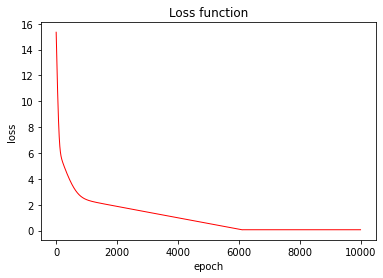

In [21]:
plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

## Momentum

In [14]:
from tensorflow.keras import optimizers

In [18]:
%%time

x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x + 5
lr = 0.001

w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)
var_list = [w1, w2, b]

#Momentum 적용
opt = optimizers.SGD(learning_rate=lr, momentum=0.7)

histLoss = []
for epoch in range(10000):
    with tf.GradientTape() as tape:
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))
    
    grads = tape.gradient(loss, var_list)
    #가중치 업데이트
    opt.apply_gradients(zip(grads, var_list))

    histLoss.append(loss)
    if epoch % 500 == 0:
        print(f"epoch = {epoch}, loss = {loss}")
        print(f"w1 = {w1.numpy()}, w2 = {w2.numpy()}")



epoch = 0, loss = 15.339600563049316
w1 = 1.010164737701416, w2 = 1.0009921789169312
epoch = 500, loss = 2.023297071456909
w1 = 2.202728509902954, w2 = 2.9980216026306152
epoch = 1000, loss = 1.2853883504867554
w1 = 2.128865957260132, w2 = 3.008208751678467
epoch = 1500, loss = 0.5479283928871155
w1 = 2.054847478866577, w2 = 3.0034937858581543
epoch = 2000, loss = 0.0375760979950428
w1 = 1.996767520904541, w2 = 3.0000345706939697
epoch = 2500, loss = 0.03759327903389931
w1 = 1.9967671632766724, w2 = 3.0000345706939697
epoch = 3000, loss = 0.03759327903389931
w1 = 1.9967671632766724, w2 = 3.0000345706939697
epoch = 3500, loss = 0.03759327903389931
w1 = 1.9967671632766724, w2 = 3.0000345706939697
epoch = 4000, loss = 0.03759327903389931
w1 = 1.9967671632766724, w2 = 3.0000345706939697
epoch = 4500, loss = 0.03759327903389931
w1 = 1.9967671632766724, w2 = 3.0000345706939697
epoch = 5000, loss = 0.03759327903389931
w1 = 1.9967671632766724, w2 = 3.0000345706939697
epoch = 5500, loss = 0.037

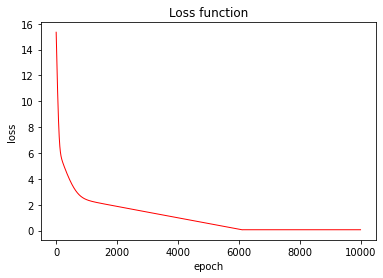

In [22]:
plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

## Adam

In [24]:
%%time

x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x + 5
lr = 0.001

w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)
var_list = [w1, w2, b]

#Momentum 적용
opt = optimizers.SGD(learning_rate=lr)


def loss():
  return tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))


histLoss = []
for epoch in range(10000):
  #gradient 구하고 가중치 업데이트
  opt.minimize(loss, var_list=var_list)

   
  histLoss.append(loss())
  if epoch % 500 == 0:
      print(f"epoch = {epoch}, loss = {histLoss[-1]}")

epoch = 0, loss = 15.234724998474121
epoch = 500, loss = 3.650076150894165
epoch = 1000, loss = 2.387208938598633
epoch = 1500, loss = 2.0919768810272217
epoch = 2000, loss = 1.8687878847122192
epoch = 2500, loss = 1.6475082635879517
epoch = 3000, loss = 1.4262508153915405
epoch = 3500, loss = 1.2049928903579712
epoch = 4000, loss = 0.9837347865104675
epoch = 4500, loss = 0.7624766230583191
epoch = 5000, loss = 0.5412188768386841
epoch = 5500, loss = 0.3199608325958252
epoch = 6000, loss = 0.0987028032541275
epoch = 6500, loss = 0.06282133609056473
epoch = 7000, loss = 0.06281332671642303
epoch = 7500, loss = 0.06271672248840332
epoch = 8000, loss = 0.06271672248840332
epoch = 8500, loss = 0.06271672248840332
epoch = 9000, loss = 0.06271672248840332
epoch = 9500, loss = 0.06271672248840332
CPU times: user 28.2 s, sys: 86.3 ms, total: 28.3 s
Wall time: 29.2 s


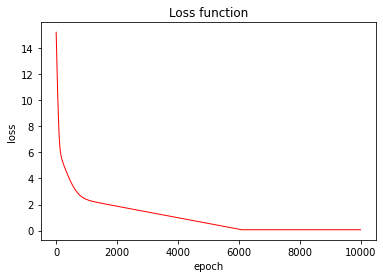

In [25]:
plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

## karas

In [35]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

#데이터 만들기
x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x + 5
dataX = np.stack([x*x, x]).T


In [32]:
np.array([x*x, x]).shape

(2, 100)

In [33]:
np.stack([x*x, x]).T.shape

(100, 2)

In [37]:
#모델만들기
model = Sequential()
model.add(Dense(1, input_dim=2))

model.compile(loss='mse', optimizer=optimizers.RMSprop(lr=0.05))
h = model.fit(dataX, y, batch_size=10, epochs=300)

Epoch 1/300
10/10 [==============================] - 0s 2ms/step - loss: 702.3320
Epoch 2/300
10/10 [==============================] - 0s 2ms/step - loss: 385.8700
Epoch 3/300
10/10 [==============================] - 0s 2ms/step - loss: 216.4906
Epoch 4/300
10/10 [==============================] - 0s 2ms/step - loss: 113.4522
Epoch 5/300
10/10 [==============================] - 0s 2ms/step - loss: 52.5727
Epoch 6/300
10/10 [==============================] - 0s 2ms/step - loss: 21.0577
Epoch 7/300
10/10 [==============================] - 0s 2ms/step - loss: 8.4006
Epoch 8/300
10/10 [==============================] - 0s 2ms/step - loss: 3.8492
Epoch 9/300
10/10 [==============================] - 0s 2ms/step - loss: 2.0708
Epoch 10/300
10/10 [==============================] - 0s 2ms/step - loss: 1.2886
Epoch 11/300
10/10 [==============================] - 0s 2ms/step - loss: 0.8822
Epoch 12/300
10/10 [==============================] - 0s 2ms/step - loss: 0.5104
Epoch 13/300
10/10 [=======

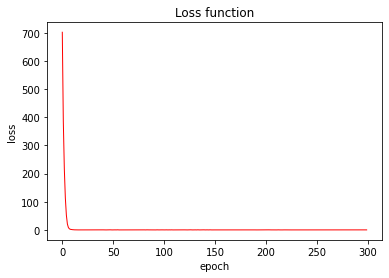

In [43]:
plt.plot(h.history['loss'], color = 'red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [42]:
params = model.layers[0].get_weights()
print("w1 : {:.2f}".format(params[0][0][0]))
print("w2 : {:.2f}".format(params[0][1][0]))
print("b : {:.2f}".format(params[1][0]))

w1 : 2.00
w2 : 3.00
b : 4.96


## Functional API

In [52]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model


x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x + 5
dataX = np.stack([x*x, x]).T

xInput = Input(batch_shape=(None, dataX.shape[1]))
yOutput = Dense(1)(xInput)
model = Model(xInput, yOutput)
model.compile(loss="mse", optimizer=optimizers.Adam(learning_rate=0.05))

h = model.fit(dataX, y, batch_size=10, epochs=300)

Epoch 1/300
10/10 [==============================] - 0s 2ms/step - loss: 642.4102
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 401.0317
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 241.3939
Epoch 4/300
10/10 [==============================] - 0s 2ms/step - loss: 120.1933
Epoch 5/300
10/10 [==============================] - 0s 2ms/step - loss: 63.9007
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 34.8756
Epoch 7/300
10/10 [==============================] - 0s 2ms/step - loss: 20.9811
Epoch 8/300
10/10 [==============================] - 0s 3ms/step - loss: 14.2586
Epoch 9/300
10/10 [==============================] - 0s 2ms/step - loss: 10.0176
Epoch 10/300
10/10 [==============================] - 0s 2ms/step - loss: 7.1360
Epoch 11/300
10/10 [==============================] - 0s 2ms/step - loss: 5.2956
Epoch 12/300
10/10 [==============================] - 0s 3ms/step - loss: 3.8885
Epoch 13/300
10/10 [====

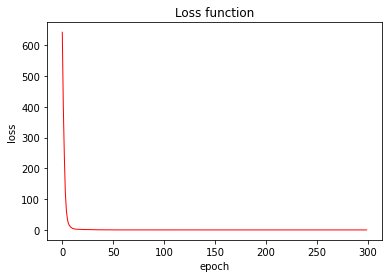

In [53]:
plt.plot(h.history['loss'], color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [54]:
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [55]:
arams = model.layers[1].get_weights()
print("w1 : {:.2f}".format(params[0][0][0]))
print("w2 : {:.2f}".format(params[0][1][0]))
print("b : {:.2f}".format(params[1][0]))

w1 : 2.00
w2 : 3.00
b : 4.96


## 예시

In [46]:
import tensorflow.compat.v1 as tf
tf.__version__

'2.3.0'

In [56]:
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [80]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [57]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = pd.get_dummies(iris.target).to_numpy()

In [58]:
iris_y[:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [59]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size=0.3, random_state=42)

In [60]:
train_X.shape

(105, 4)

In [61]:
#x, y 의 변수 선언
x = tf.placeholder(tf.float32, [None, 4]) #변수의 수가 4개
y = tf.placeholder(tf.float32, [None, 3]) #클래스가 3개

In [62]:
W = tf.Variable(tf.zeros([4, 3])) #weight shape (입력의 갯수, 출력의 갯수)
b = tf.Variable(tf.zeros([3])) #bias shape (출력의 갯수)

In [63]:
#출력
h = tf.nn.softmax(tf.matmul(x, W) + b)

In [64]:
#손실 함수 정의
cross_entropy = -tf.reduce_sum(y*tf.log(h), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)


In [65]:
#학습 정의 - Loss함수, optimizer
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [66]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [67]:
for i in range(100000):
    _, loss_values = sess.run([train, loss], feed_dict={x:train_X, y:train_y})
    if i % 10000 == 0:
        print(i, loss_values)

0 1.0986123
10000 0.37425947
20000 0.28379795
30000 0.23611484
40000 0.20631167
50000 0.18581773
60000 0.17079735
70000 0.15927438
80000 0.15012614
90000 0.14267017


In [68]:
correct_prediction = tf.equal(tf.argmax(h, 1), tf.argmax(y, 1))

In [69]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [70]:
print(sess.run(accuracy, feed_dict={x:test_X, y:test_y}))

1.0


In [71]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [72]:
n_features = train_X.shape[1]
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features, ))) #1차원
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

In [73]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(train_X, np.argmax(train_y, axis=1), epochs=300, batch_size=32)

In [84]:
loss, acc = model.evaluate(test_X, np.argmax(test_y, axis=1), verbose=0)
print(f'test accuracy : {acc}')

test accuracy : 1.0


In [83]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.002, decay=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_X, np.argmax(train_y, axis=1), epochs=300, batch_size=32, verbose=0)
loss, acc = model.evaluate(test_X, np.argmax(test_y, axis=1), verbose=0)
print(f'test accuracy : {acc}')

test accuracy : 1.0


## Functional API 예시

In [86]:
#input, output 정의해주기

input_layer = Input(shape=(n_features, ))
hidden_layer_1 = Dense(10)(input_layer)
hidden_layer_2 = Dense(8)(hidden_layer_1)
output_layer = Dense(3, activation='softmax')(hidden_layer_2)
model = Model(input_layer, output_layer)

In [87]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.002, decay=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_X, np.argmax(train_y, axis=1), epochs=300, batch_size=32, verbose=0)
loss, acc = model.evaluate(test_X, np.argmax(test_y, axis=1), verbose=0)
print(f'test accuracy : {acc}')

test accuracy : 1.0
